# 1. 深层循环神经网络

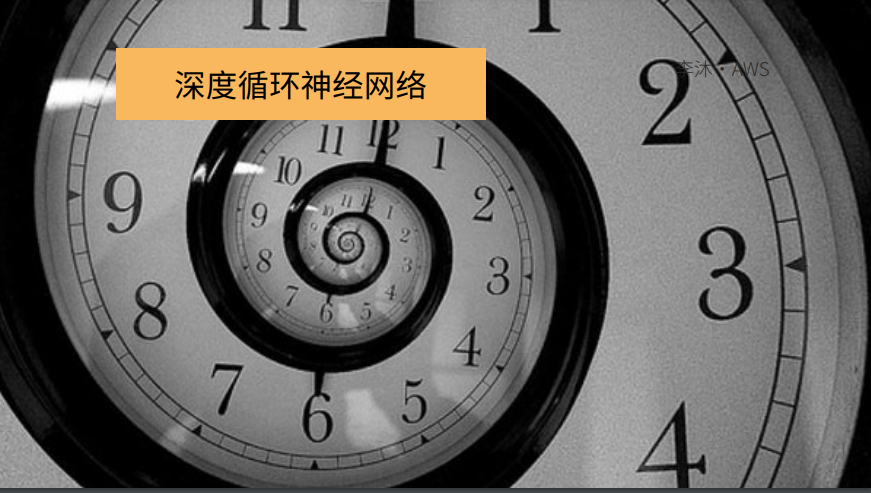

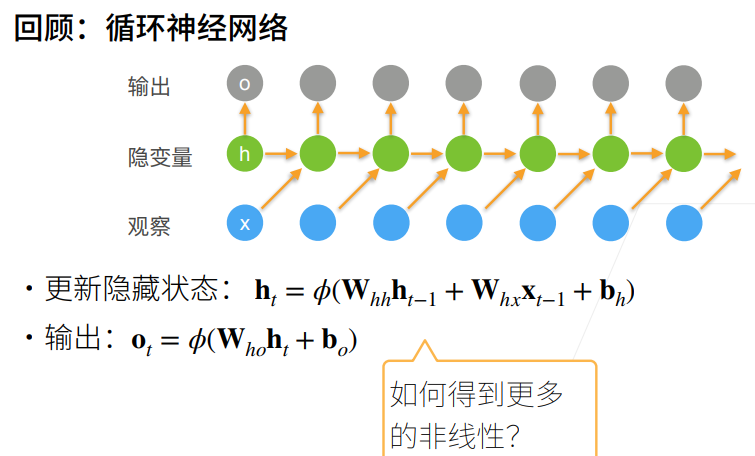

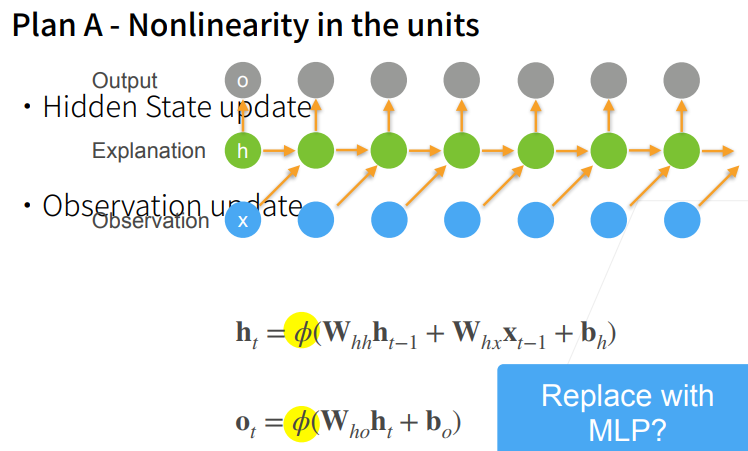

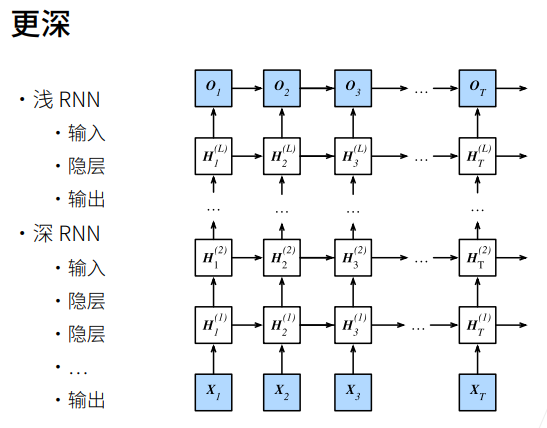

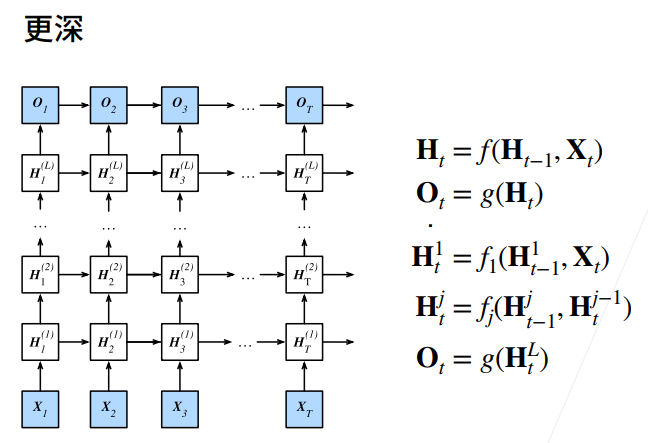

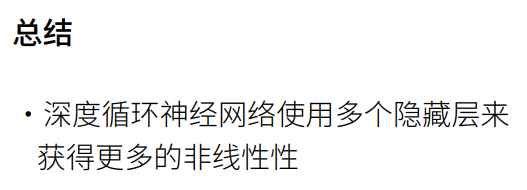

# 2. 深层循环神经网络

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

# 定义每个小批量的样本数量和时间步数
batch_size, num_steps = 32, 35
# 使用d2l库中的load_data_time_machine函数加载时间机器数据集
# 将数据集划分为以batch_size为批量大小，num_steps为时间步数的小批量数据
# train_iter是用于训练的迭代器，vocab是数据集的词汇表
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

In [2]:
# 通过 num_layers 的值来设定隐藏层数
# 将vocab的长度作为vocab_size，即词汇表的大小
# 设置隐藏状态的维度为256，即num_hiddens
# 设置隐藏层数为2，即num_layers
# 这些值是手动设置的超参数，用于定义模型的隐藏状态的维度和隐藏层数
vocab_size, num_hiddens, num_layers = len(vocab), 256, 2
# 将输入的维度设置为词汇表的大小，用于将词汇表中的词转换为嵌入向量
num_inputs = vocab_size
# 尝试使用 GPU 运行，如果没有可用的 GPU，则使用 CPU 运行
device = d2l.try_gpu()
# 创建 LSTM 层
# num_inputs 表示输入的特征维度，即词汇表的大小
# num_hiddens 表示隐藏状态的维度，即 LSTM 单元中的隐藏单元数量
# num_layers 表示 LSTM 的隐藏层数
lstm_layer = nn.LSTM(num_inputs, num_hiddens, num_layers)
# 创建 RNNModel 模型，用于将 LSTM 层与输出层结合起来
# lstm_layer 是 LSTM 层的实例
# len(vocab) 表示输出层的输出维度，即词汇表的大小
model = d2l.RNNModel(lstm_layer, len(vocab))
# 将模型移动到设备上进行计算，即将模型放到 GPU 或 CPU 上运行
model = model.to(device)

perplexity 1.0, 213727.4 tokens/sec on cuda:0
time travelleryou can show black is white by argument said filby
travelleryou can show black is white by argument said filby


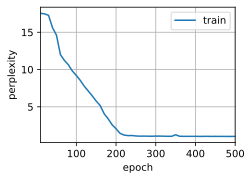

In [3]:
# 训练
# 设置训练的总轮数为500，学习率为2
num_epochs, lr = 500, 2
# 使用d2l库中的train_ch8函数进行模型训练
# model为待训练的模型
# train_iter为训练数据的迭代器
# vocab为词汇表
# lr为学习率
# num_epochs为总的训练轮数
# device为模型的运行设备，可以是GPU或CPU
d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, device)